### 希腊字母手写识别

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yyz.FinalWork as wk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from time import time
%matplotlib inline

data_x_path = "data//data_x_greek.npy"
data_y_path = "data//data_y_greek.npy"
labels_path = "data//symbols.csv"

save_model_path = 'save_models//{}.model'

my_work = wk.FinalWork(data_x_path, data_y_path, labels_path)

def test_model(mod, use_pca=False, return_cm=False):
    time_start = time()
    model, score, pca, cm = my_work.evaluate_model(mod, use_pca=use_pca, return_confusion_matrix=return_cm)
    print("score is: {}".format(score))
    
    if not isinstance(cm, int):
        print("confusion matrix is:\n{cm}".format(cm=cm))
        my_work.draw_confusion_matrix(cm)
        my_work.draw_error_rate_matrix(cm)
    time_end = time()
    t = time_end - time_start
    return model, score, pca, cm, t

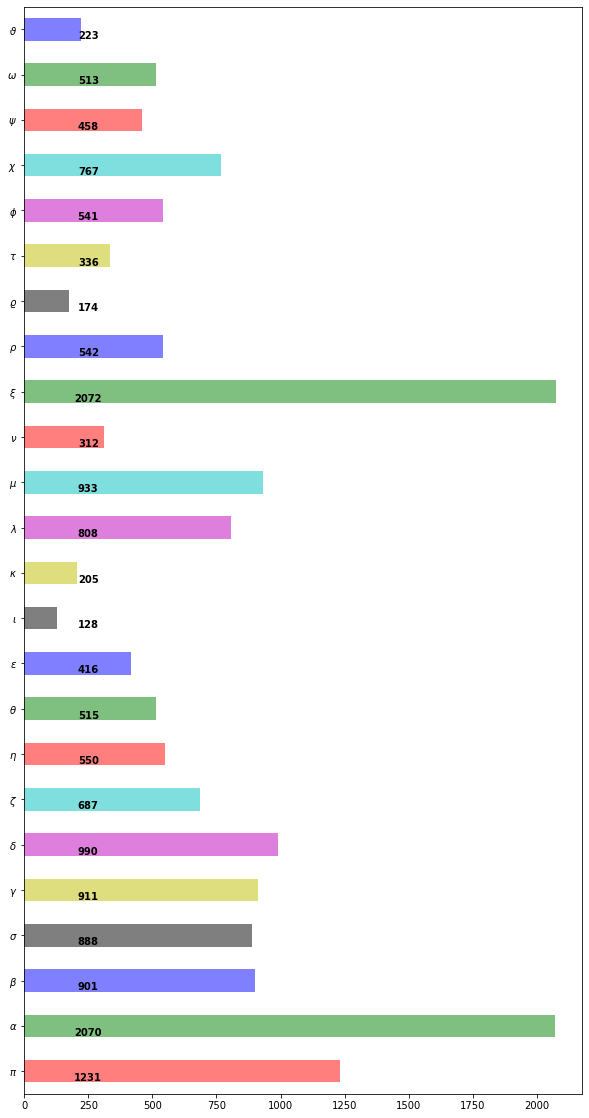

In [27]:
# 查看数据大致情况
def show_dataset_info():
    unique, counts = np.unique(my_work.y_train, return_counts=True)
    y_info_dict = { "labels" : unique, "counts": counts }
    y_info_frame = pd.DataFrame(y_info_dict)
    
    y_info_frame["labels"] = y_info_frame["labels"].apply(lambda x: my_work.label2symbol(x))
    
    # 作图
    f, ax = plt.subplots(figsize=(10, 20))
    y_info_frame["counts"].plot(kind='barh', legend=False, color=list("rgbkymc"), alpha=0.5)
    ax.set_yticklabels(list(y_info_frame["labels"]))
    
    rects = ax.patches
    bar_labels_counts = list(y_info_frame["counts"])
    
    for i in range(len(bar_labels_counts)):
        label_value = str(bar_labels_counts[i])
        ax.text(250, rects[i].get_y(), label_value, ha='center',
              va='bottom', size='medium', color="black", fontweight="bold")
    plt.savefig('./dataset.jpg')
        
show_dataset_info()

In [17]:
model_name_list = ["knn", "knn_pca", "bayes", "random_forest", "logistic"]
model_list = [KNeighborsClassifier(n_neighbors=5),
              KNeighborsClassifier(n_neighbors=5),
              BernoulliNB(alpha=0.01),
              RandomForestClassifier(n_estimators=10),
              LogisticRegression(solver='liblinear')]
model_time = []
model_score = []

model knn
score is: 0.7575122292103424
confusion matrix is:
[[222   4   1   5   1   1   0  22   0   0   6   0   2   0   0   1   3   0
   33   0   0   0   1   0]
 [  4 467   0  12   2   2   0   1   0   0   1   0  34   0   1   0   0   0
    1   0   1   0   5   0]
 [  2   2 149   1   0   0   1   0   1   5   2   0   0  11   0   1  54   0
    1   0   0   0   0   0]
 [  6   6   1 201   2   2   0   3   2   2   1   0   0   0   0   0   2   0
    6   1   0   0   0   0]
 [  2   0   2   7 165  10   2   4   0   0  11   0   9   4   1   7   1   0
    2   0   1   1   0   0]
 [  0   1   1   1   5 211   5   0   0   9  13   0   5   0   1   4   0   0
    0   0   0   0   0   0]
 [  2   1   0   1   2   5 143   1   0   4   4   0   0   0   0  21   1   0
    0   0   0   0   0   0]
 [  5   0   0   0   0   0   0 124   0   0   4   0   1   0   0   2   0   0
    0   0   0   0   0   0]
 [  1   1   2   5   1   1   2   2  96  13   2   0   0   0   0   0   6   0
    0   1   0   0   1   2]
 [  0   0   0   5   1   1   3  

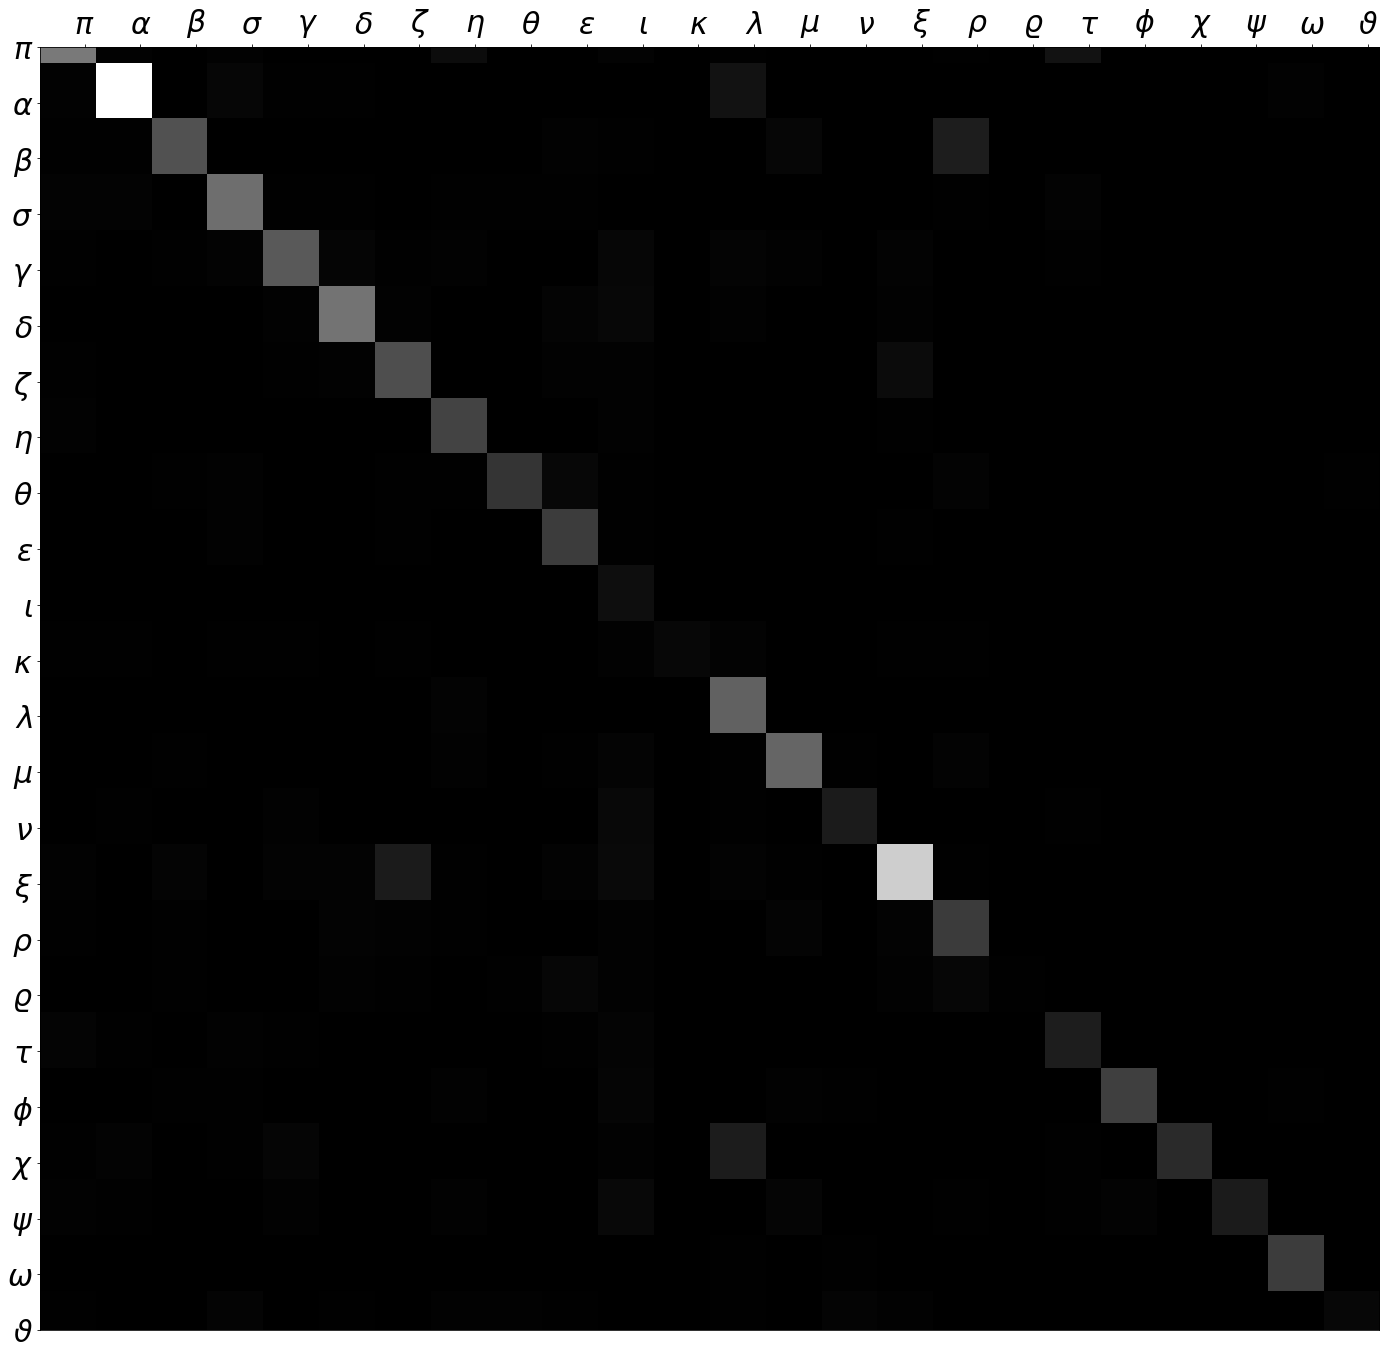

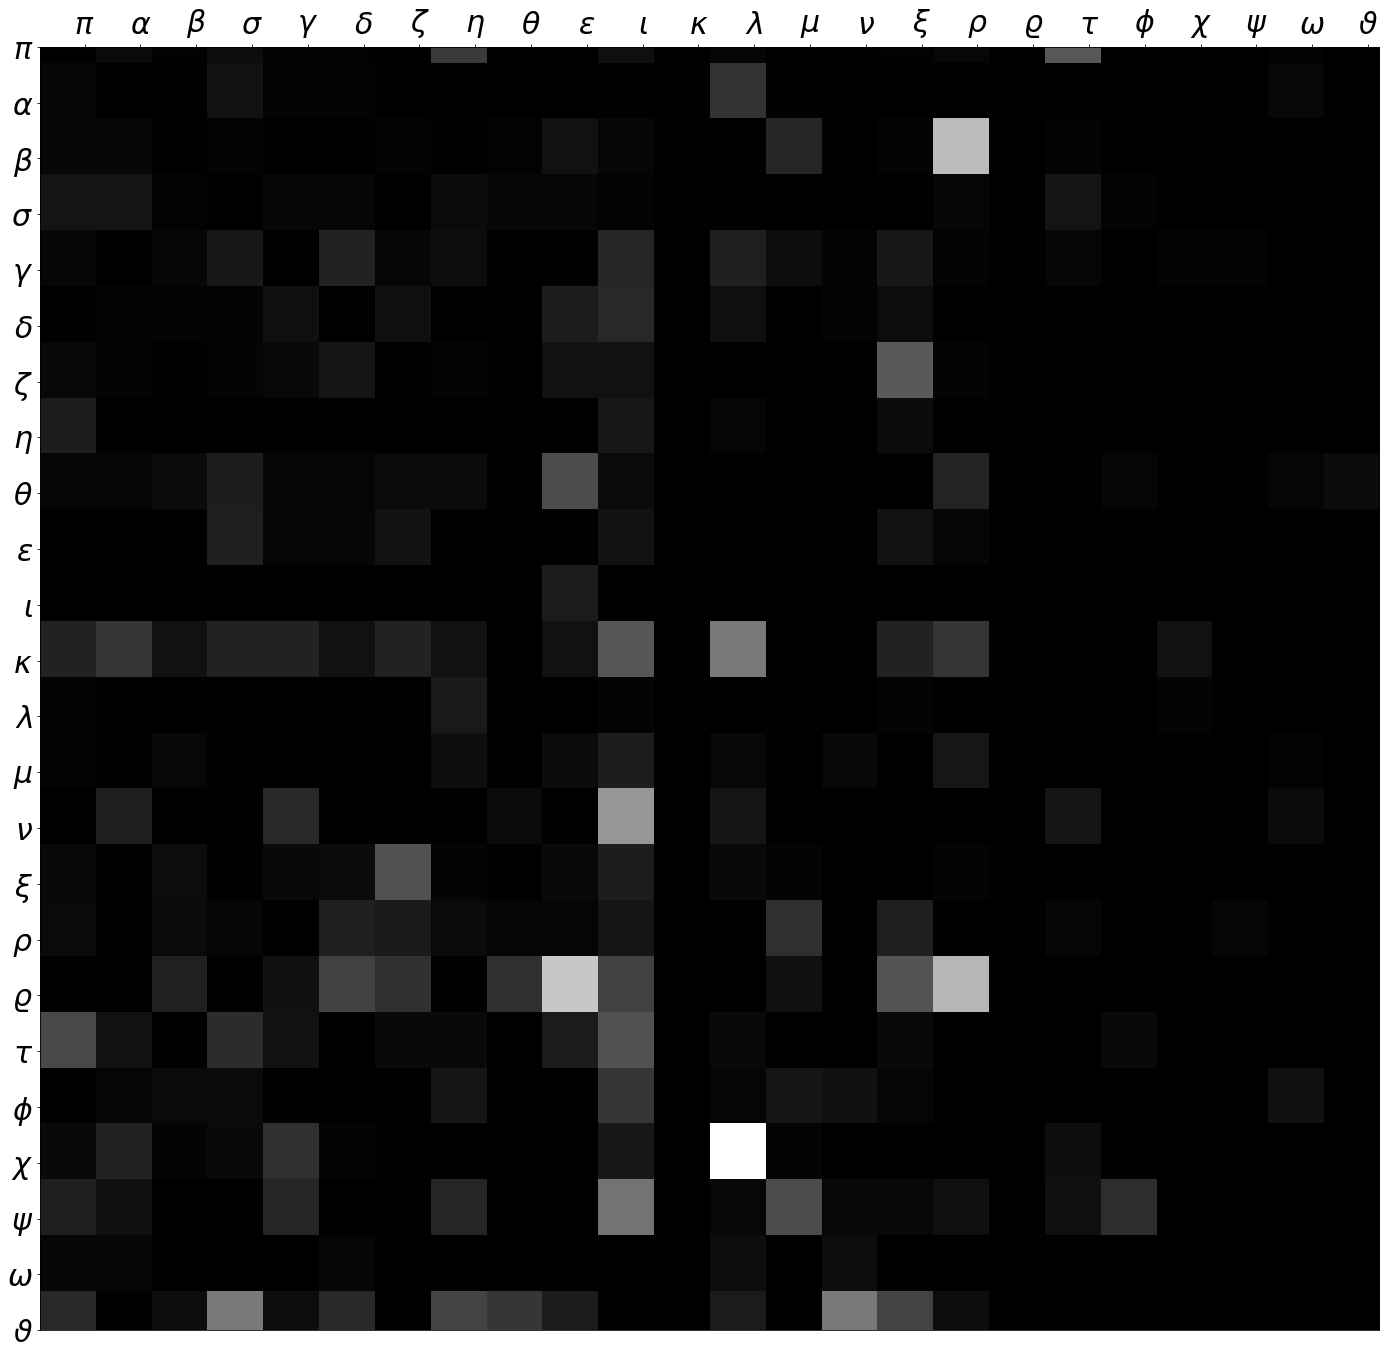

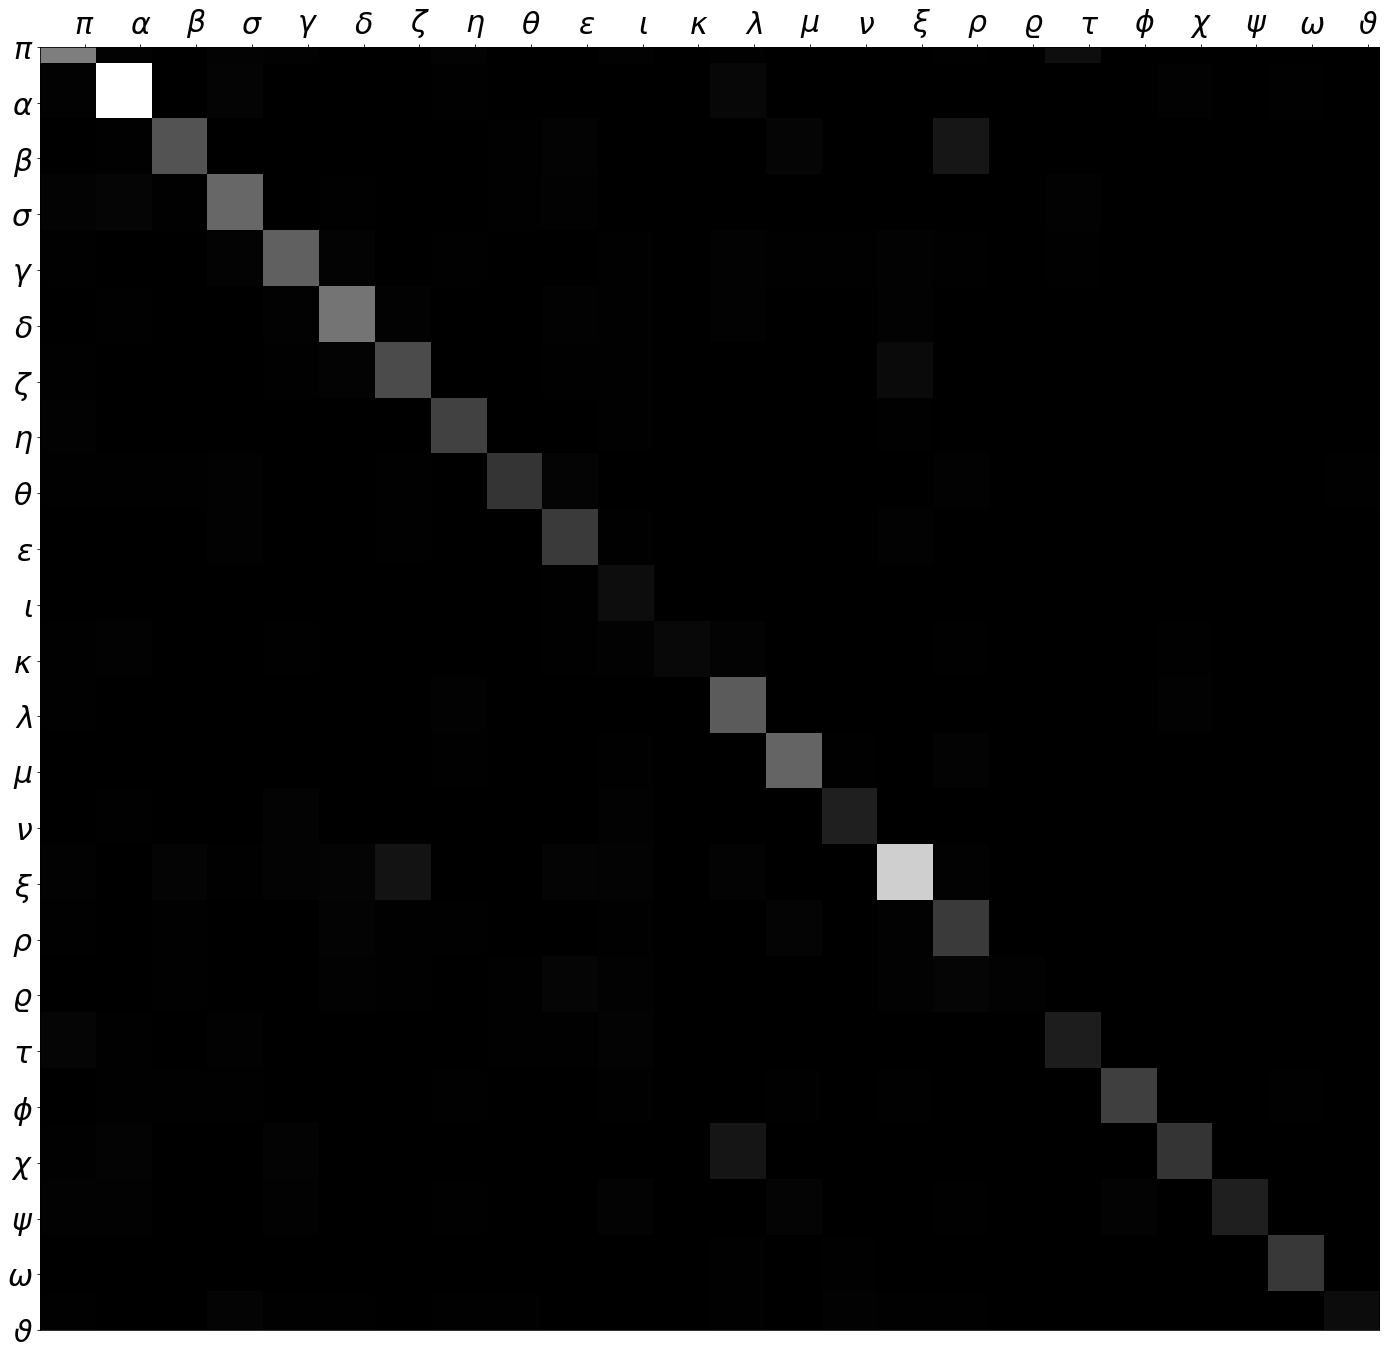

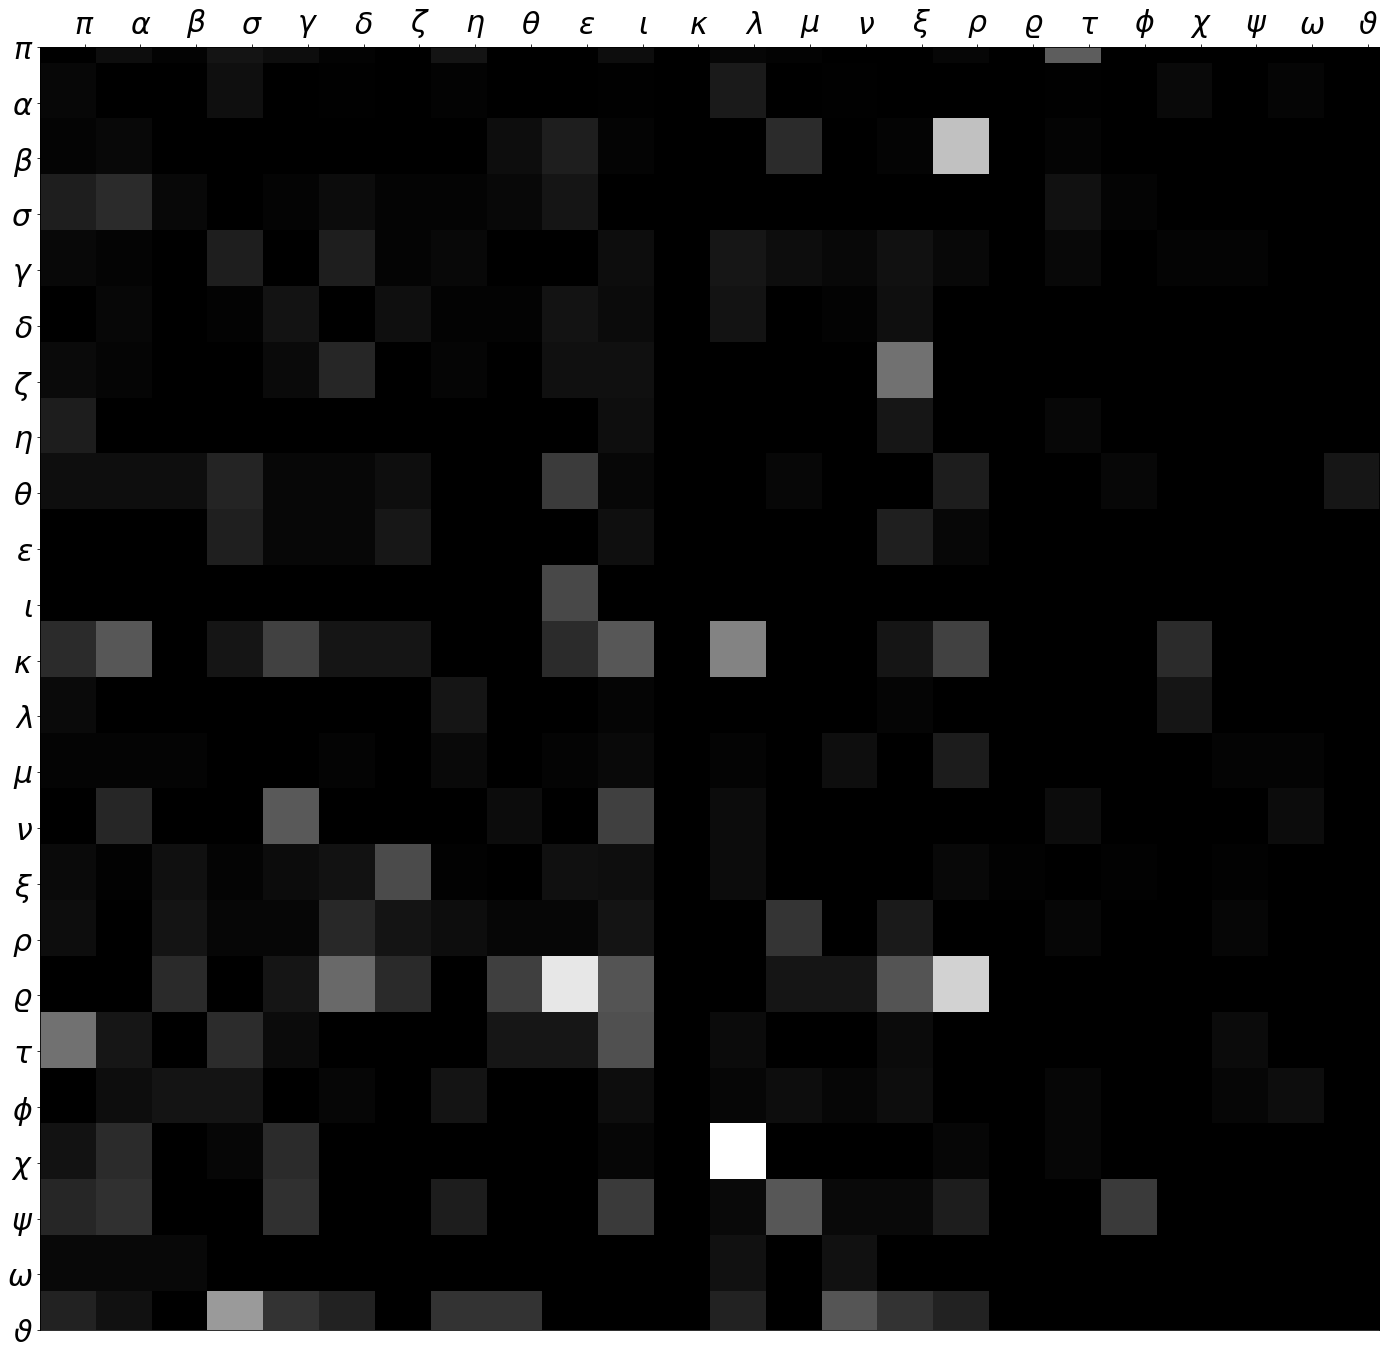

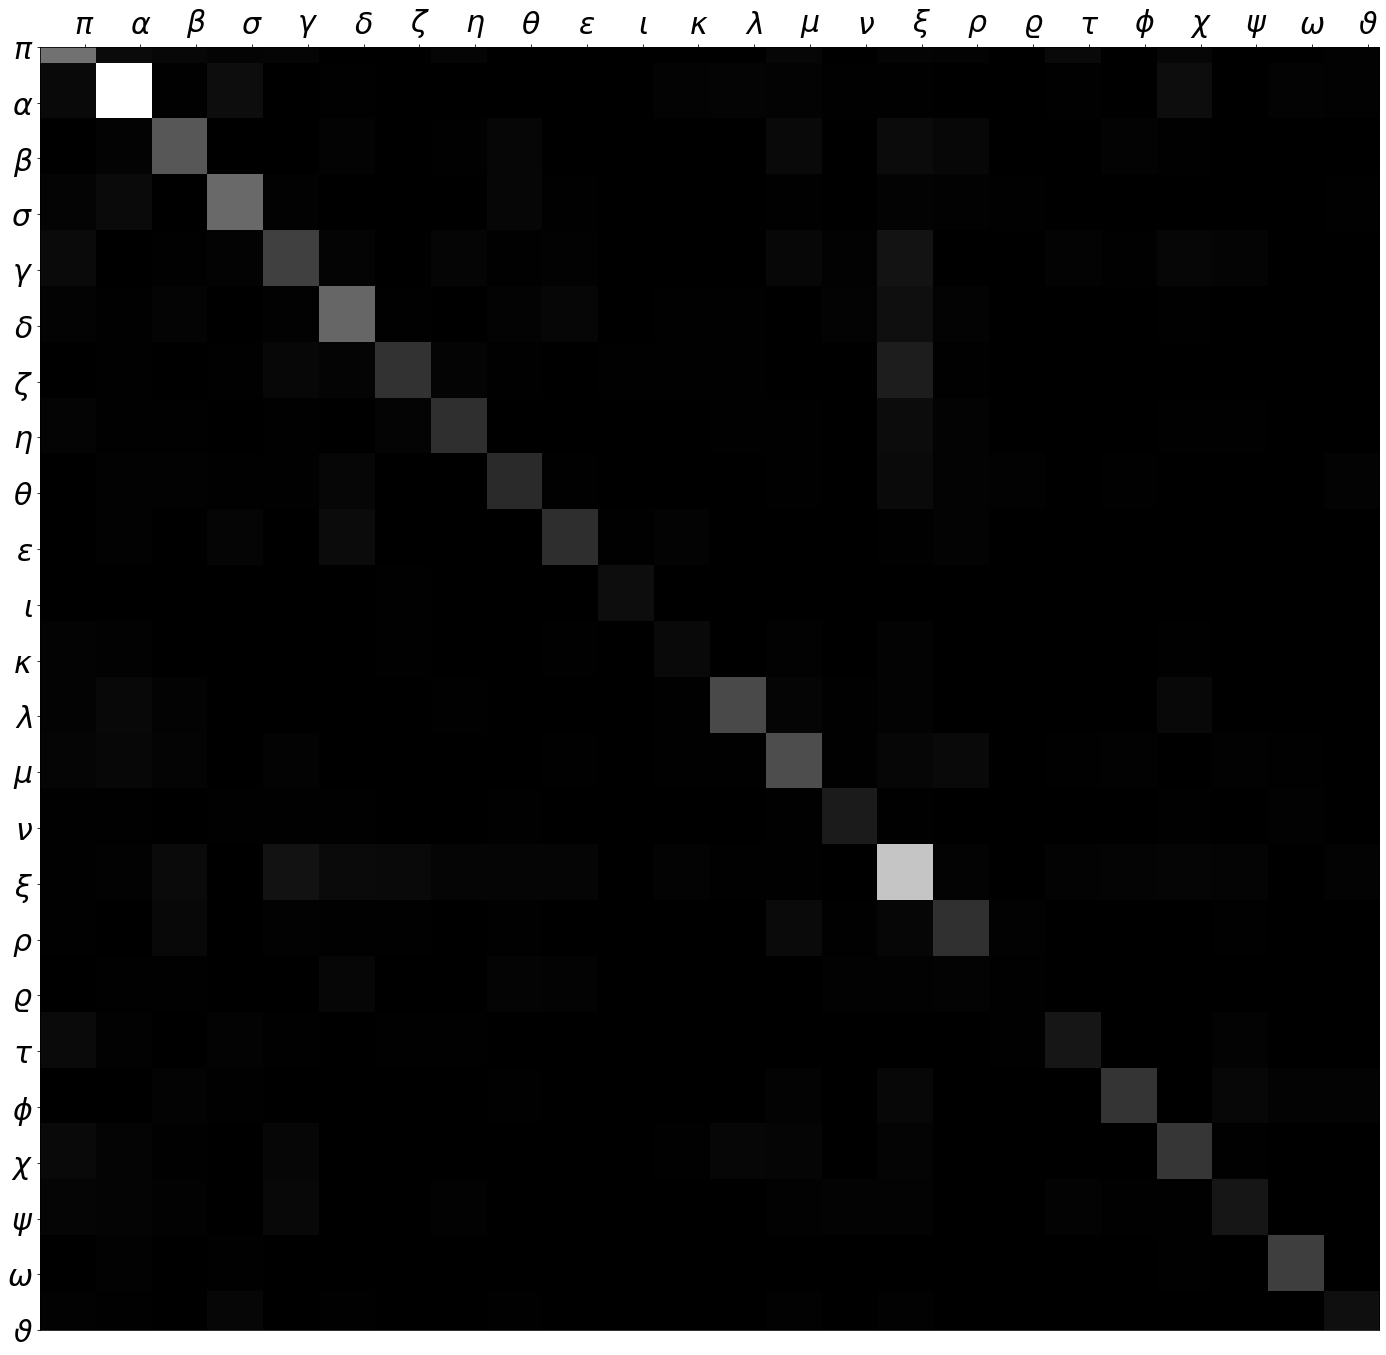

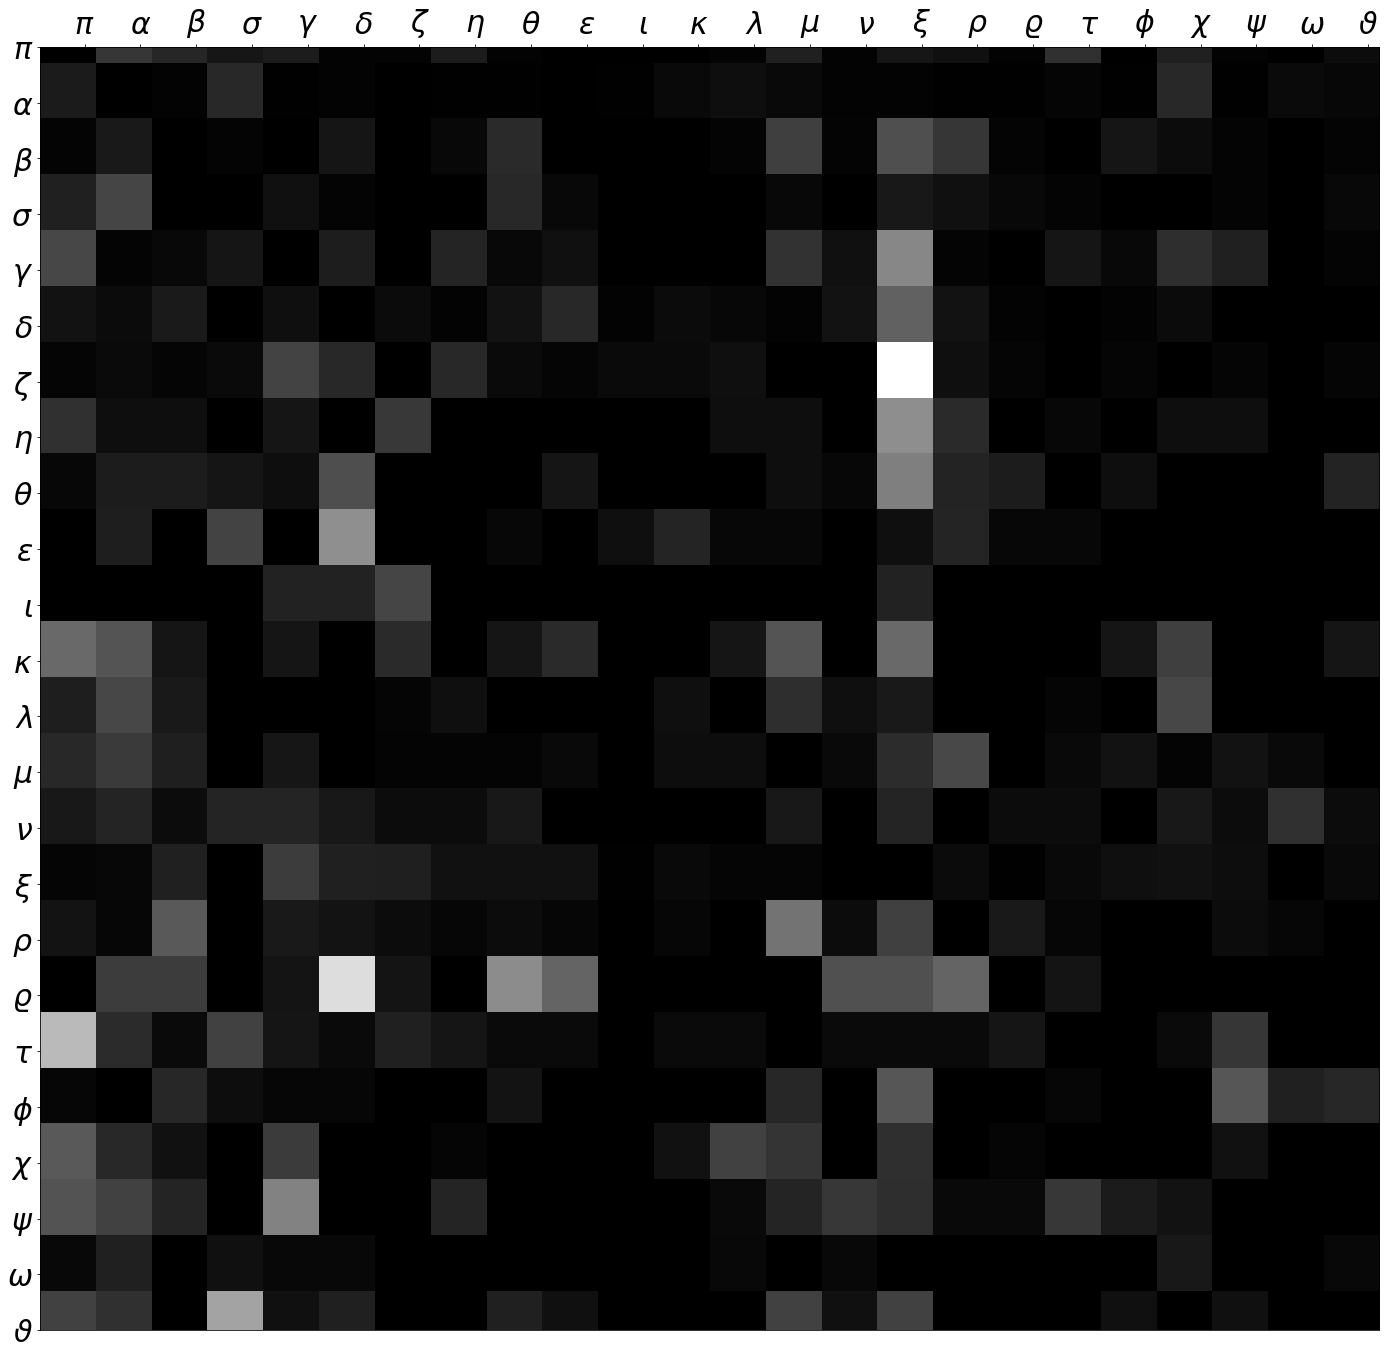

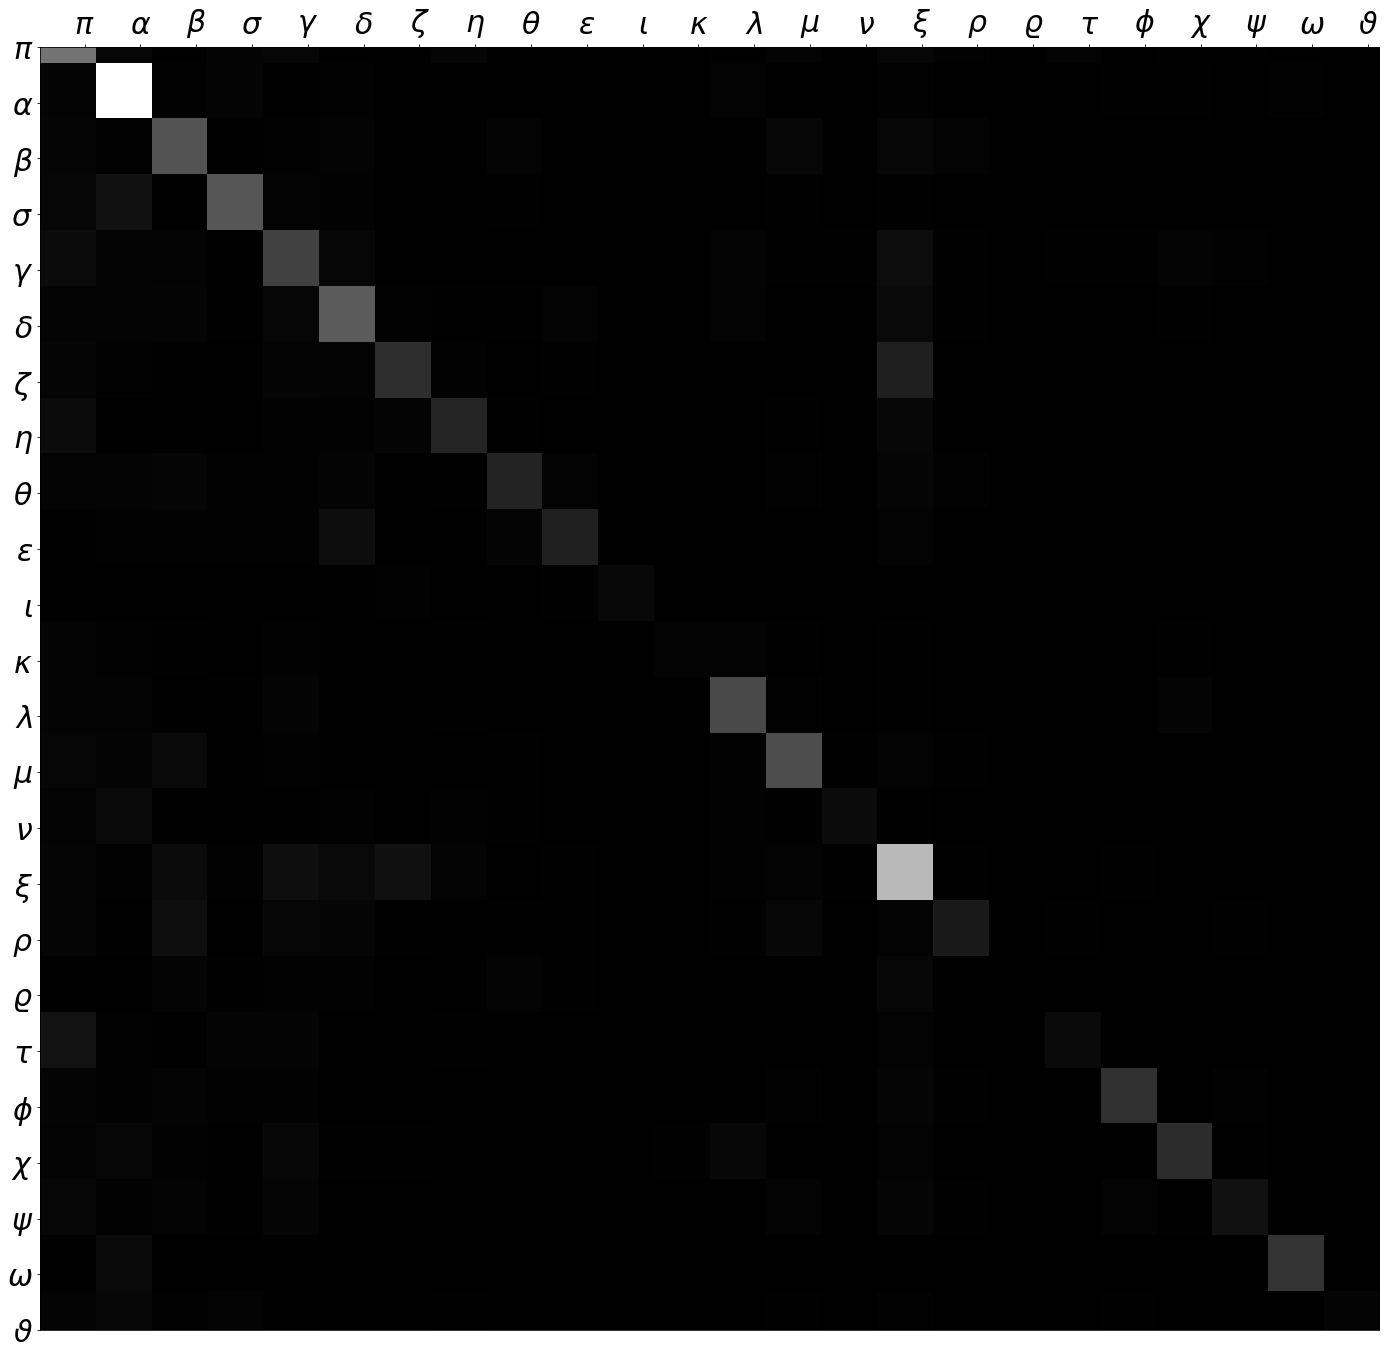

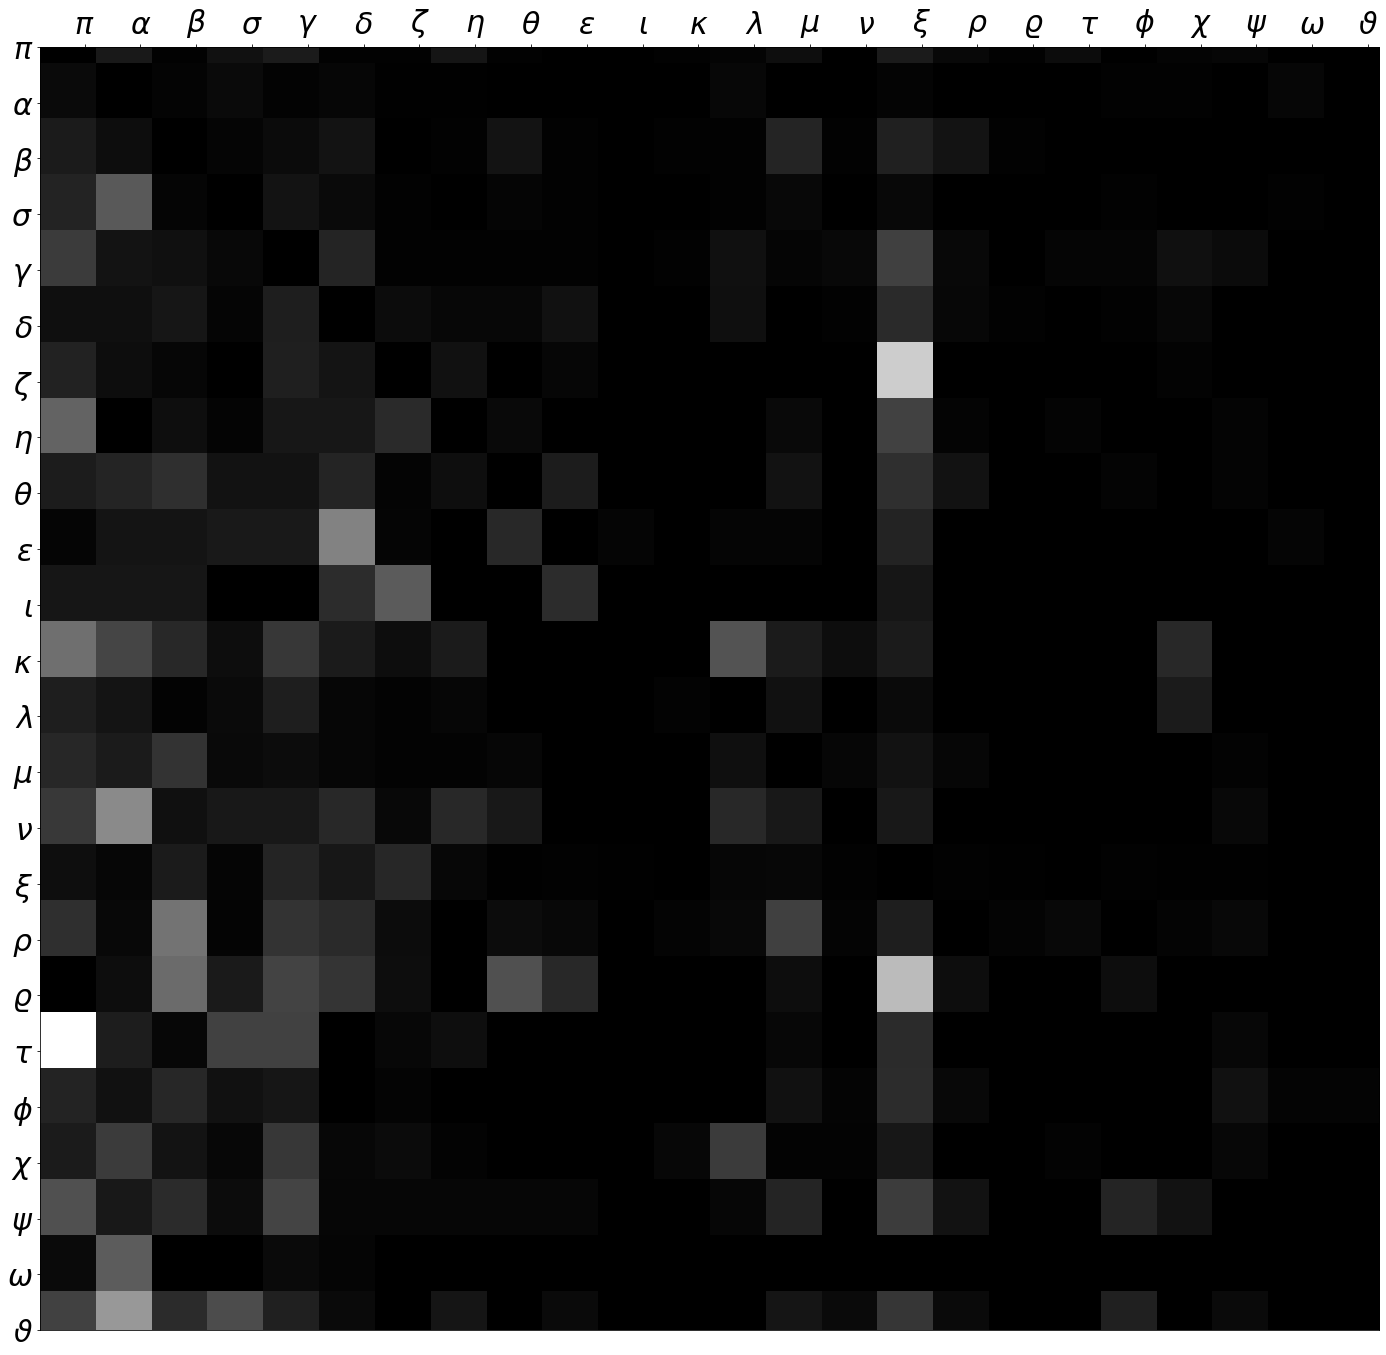

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa

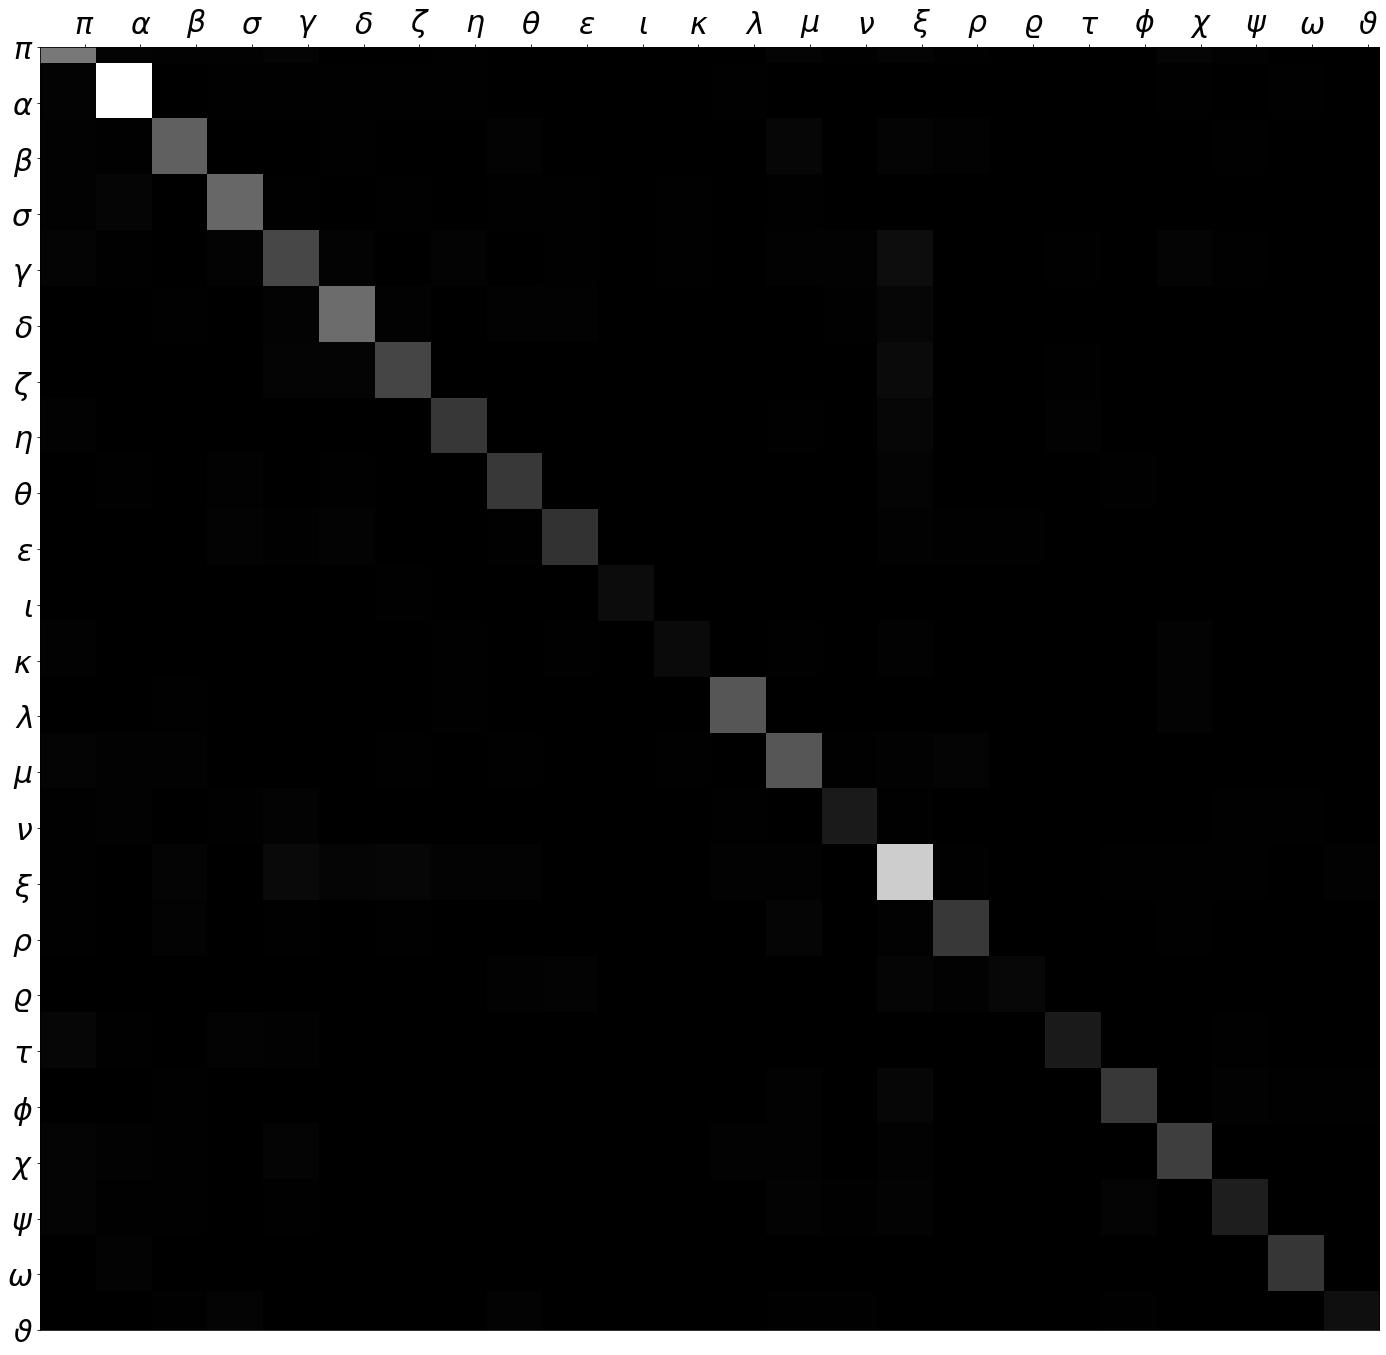

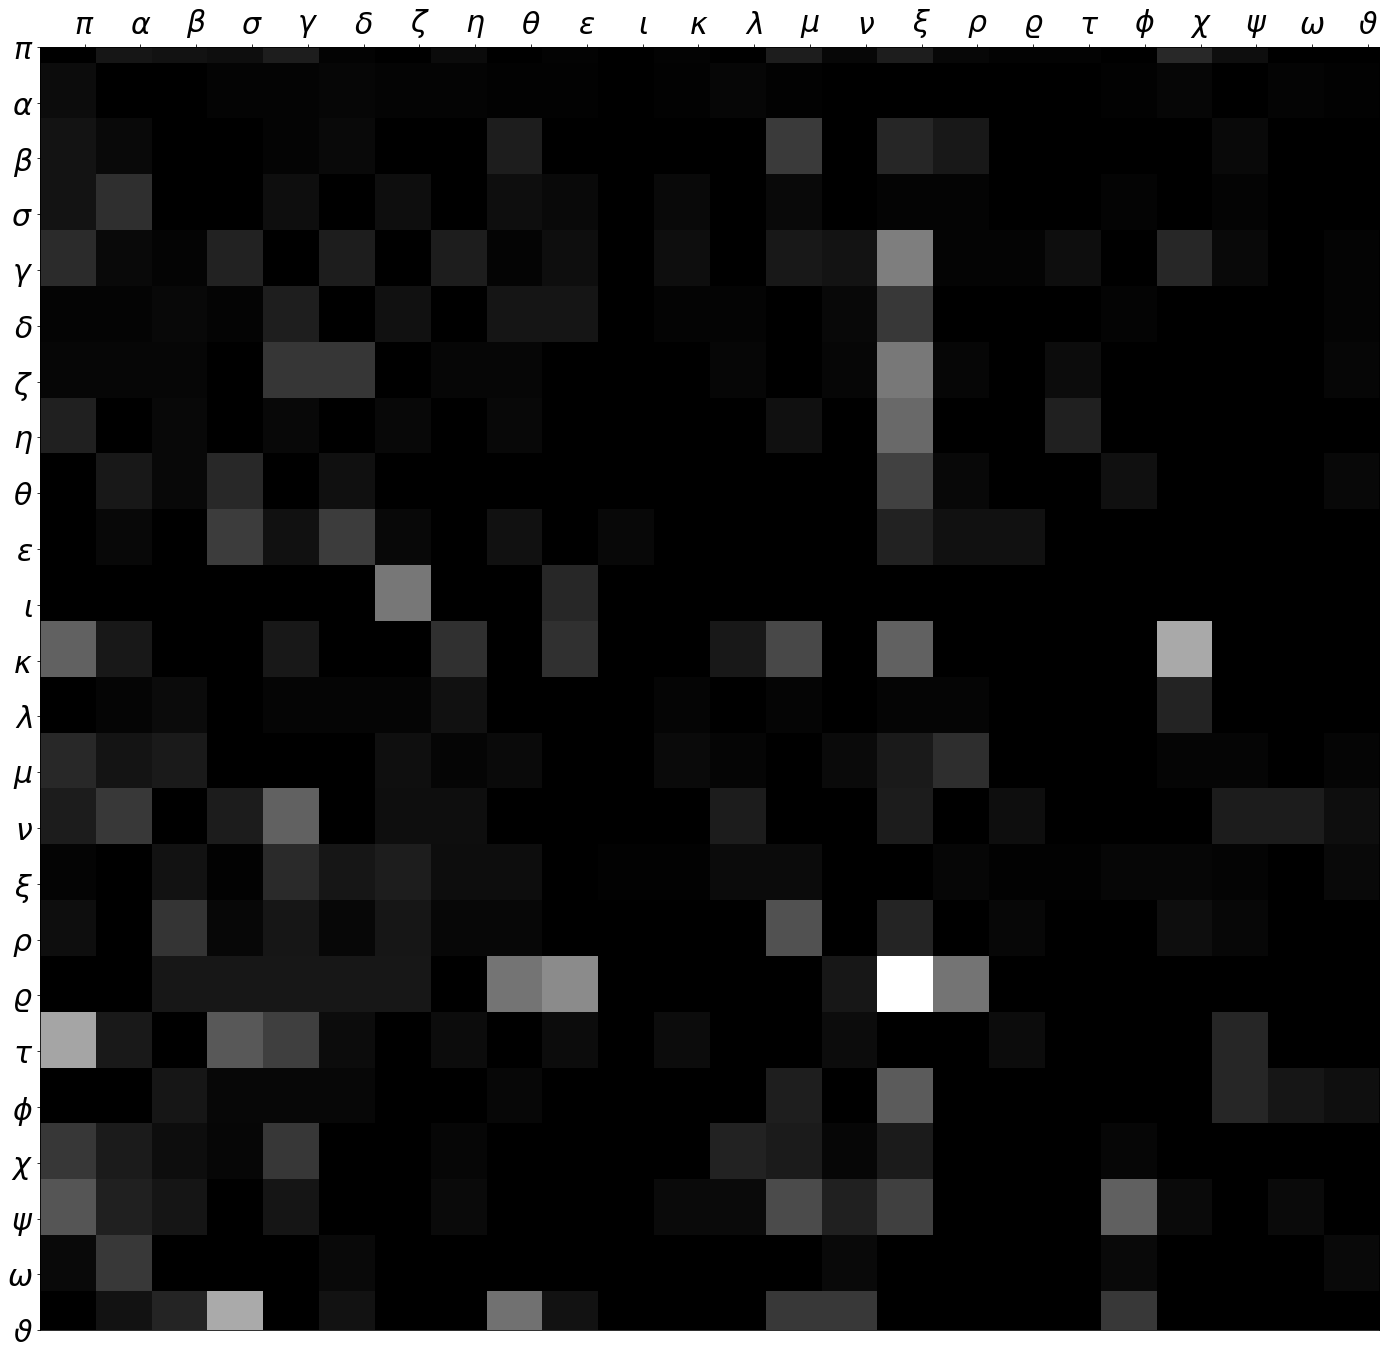

In [18]:
# 生成和保存模型
for model_, name in zip(model_list, model_name_list):
    print("model {}".format(name))
    model, score, pca, cm, t = test_model(model_, use_pca=(name!="knn"),return_cm=True)
    model_time.append(t)
    model_score.append(score)
    print("time used: {}s".format(t))
    joblib.dump(model, save_model_path.format(name))
    if pca is not 0:
        joblib.dump(pca, save_model_path.format("with_pca"+name))
    print("\n")

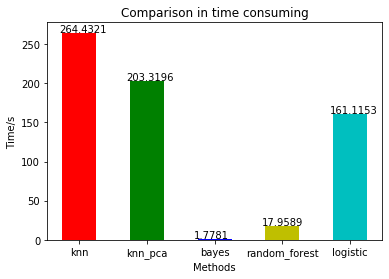

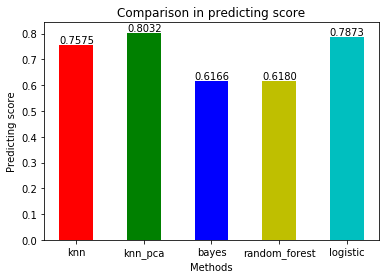

In [25]:
# 绘制时间消耗图
fig1=plt.figure()
plt.title('Comparison in time consuming')
plt.xlabel('Methods')
plt.ylabel('Time/s')
for x, y in enumerate(model_time):
    plt.text(x-0.3, y+0.1, "%.4f" %y)
plt.bar(x=model_name_list, height=model_time, width= 0.5, color=['r','g','b','y', 'c'])
plt.savefig('./time.jpg', dpi=1000)
plt.show()
# Figure of Comparison in predicting score
fig2=plt.figure()
plt.title('Comparison in predicting score')
plt.xlabel('Methods')
plt.ylabel('Predicting score')
for x, y in enumerate(model_score):
    plt.text(x-0.25, y+0.005, "%.4f" %y)
plt.bar(x=model_name_list, height=model_score, width= 0.5, color=['r','g','b','y', 'c'])
plt.savefig('./score.jpg', dpi=1000)
plt.show()

latex code: $\alpha$
predict: 


<IPython.core.display.Latex object>

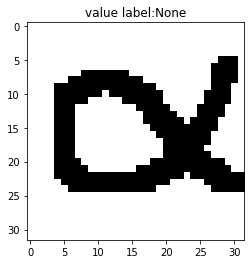

In [29]:
# 演示
from IPython.display import Latex
model_name = model_name_list[1]
pca = joblib.load(save_model_path.format("with_pca"+model_name))
model = joblib.load(save_model_path.format(model_name))
png_path = "to_pre.png"
pre = my_work.predict_png(model, png_path, pca)
print("latex code: {}".format(my_work.label2symbol((pre))))
print("predict: ")
Latex(my_work.label2symbol(pre))